In [1]:
# importing dependencies 

!pip install ydata-profiling 
#installing the library

from ydata_profiling import ProfileReport

In [2]:
# Basic libraries
import pymysql
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Other
pd.set_option('display.max_columns', None) 

## 0 Goal

The task is to build a model that will **predict the price of a house based on features provided in the dataset**. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - $650K and above. The questions have been provided later in the document for which you can use tableau.

## 1 Getting the data

In [3]:
# reading the data
data = pd.read_excel("regression_data.xls")
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [5]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
bedrooms,21597.0,3.000000e+00,1.000000e+00,1.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.000000e+00,1.000000e+00,0.0,2.000000e+00,2.000000e+00,2.000000e+00,8.000000e+00
sqft_living,21597.0,2.080000e+03,9.180000e+02,370.0,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509900e+04,4.141300e+04,520.0,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.000000e+00,1.000000e+00,1.0,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
waterfront,21597.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,0.000000e+00,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.000000e+00,1.000000e+00,1.0,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21597.0,8.000000e+00,1.000000e+00,3.0,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


In [6]:
data.shape

(21597, 21)

## 2 Cleaning the Data

In [7]:
# It is a good practice to set the ID as you data index.
# data.set_index("id", inplace=True)
# data

#### Looking at the columns

In [8]:
data['id'].nunique()

21420

**<span style='color:Blue'> There is a gap between the total number of id`s and the unique listed id´s. The gap can be explained by the fact that the houses are sold twice, which makes it unnecessary to keep the 'id' column  </span>**

In [9]:
# Drop 'id' since it is not necessary
data.drop('id', axis=1, inplace=True)
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [10]:
data['date'].unique().min()

numpy.datetime64('2014-05-02T00:00:00.000000000')

In [11]:
data['date'].unique().max()

numpy.datetime64('2015-05-27T00:00:00.000000000')

**<span style='color:Blue'> Let´s transform the date  </span>**

In [12]:
data['date_year'] = data['date'].dt.year
data['date_month'] = data['date'].dt.month
data['date_weekday'] = data['date'].dt.day
data.drop(["date"], axis = 1, inplace = True)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,date_year,date_month,date_weekday
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015,2,18


In [13]:
data['bedrooms'].unique().min()

1

In [14]:
data['bedrooms'].unique().max()

33

In [68]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

**<span style='color:Blue'> We have an outlier here with 33 rooms. Drop it? Or do we want to group more than 5 beedrooms?  </span>**

In [15]:
data['bathrooms'].unique().min()

0.5

In [16]:
data['bathrooms'].unique().max()

8.0

In [69]:
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

**<span style='color:Blue'> Again not a lot of houses with >4 bathrooms.  </span>**

In [17]:
data['sqft_living'].unique().min()

370

In [18]:
data['sqft_living'].unique().max()

13540

In [19]:
data['sqft_lot'].unique().min()

520

In [20]:
data['sqft_lot'].unique().max()

1651359

In [21]:
data['floors'].unique().min()

1.0

In [22]:
data['floors'].unique().max()

3.5

In [23]:
data['waterfront'].unique()

array([0, 1], dtype=int64)

In [24]:
data['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [25]:
data['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [26]:
data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [27]:
data['sqft_above'].unique().min()

370

In [28]:
data['sqft_above'].unique().max()

9410

In [29]:
data['sqft_basement'].unique().min()

0

In [30]:
data['sqft_basement'].unique().max()

4820

In [31]:
data['yr_built'].unique().min()

1900

In [32]:
data['yr_built'].unique().max()

2015

In [33]:
data['yr_renovated'].unique().min()

0

In [34]:
data['yr_renovated'].unique().max()

2015

In [35]:
data['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

**<span style='color:Blue'> We added a new column called "renovated" with the info  '1' (renovated) and '0' (not renovated). If 'yr_renovated' is not neseccary anymore we should drop it (Take a closer look at correlation)  </span>**

In [36]:
# Create a new column called "new_column" and set all values to 1
data['renovated'] = 1

# Change the values in "renovated" to 0 where "yr_renovated" is 0
data.loc[data['yr_renovated'] == 0, 'renovated'] = 0
data['renovated'].value_counts()

0    20683
1      914
Name: renovated, dtype: int64

In [74]:
data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

**<span style='color:Blue'> The first digit represents a group of states or a region of the country. For Seattle, the first digit is always "9", which represents the western region of the United States.
The second and third digits represent a sectional center facility (SCF), which is a regional USPS sorting facility that serves a specific geographic area. In Seattle, the second and third digits range from "80" to "98", and each represents a different SCF.
The fourth and fifth digits represent a delivery area within the SCF. The last two digits can indicate a specific neighborhood, building, or block within the SCF's service area.  </span>**

In [37]:
data['lat'].nunique()

5033

In [38]:
data['long'].nunique()

751

In [39]:
data['sqft_living15'].unique().min()

399

In [40]:
data['sqft_living15'].unique().max()

6210

In [41]:
data['sqft_lot15'].unique().min()

651

In [42]:
data['sqft_lot15'].unique().max()

871200

In [43]:
data['price'].unique().min()

78000

In [44]:
data['price'].unique().max()

7700000

**id**: 21,420 listed houses --> Dropped this column

**date**: house sold between 02/05/14 - 27/05/15 --> Transformed it

**bedrooms**: number of bedrooms between 1 and 33

**bathrooms**: number of bathrooms between 0.5 and 8

**sqft_living**: size of living area between 370 and 13,540 sqft

**sqft_lot**: size of lot between 520 and 1,651,359 sqft

**floors**: number of floors between 1 and 3.5 floors

**waterfront**: house which has a view to a waterfront (1 = waterfront and 0 = no waterfront)

**view**: number of times the house has been viewed by potential buyers between 0 and 4 views

**condition**: how good the condition is overall (1 = worn out property and 5 = excellent)

**grade**: overall grade given to the housing unit (1 = poor and 13 = excellent) between 3 and 13

**sqft_above**: square footage of house apart from basement

**sqft_basement**: square footage of basement

**yr_built**: year the house was built between 1900 and 2015

**yr_renovated**: year the house was renovated (0 never) between 1934 and 2015 --> Added a new column called "renovated" involving 0 = not renovated and 1 = renovated

**zipcode**: zipcode of the location

**lat**: geographical latitude of the location

**long**: geographical longitude of the location

**sqft_living15**: living area in 2015 implies previous renovations and might have affected the lot size between 399 and 6,210

**sqft_lot15**: lot size in 2015 implies pevious renovations between 651 and 871,200

**price**: price of the house between 78,000 and 7,700,000

#### Dealing with Nulls

In [45]:
# This function finds null values, empty strings and duplicated rows
def explore_data(data): 
    
    duplicate_rows = data.duplicated().sum() # check duplicated data (rows)
    nan_values = data.isna().sum() # check null
    empty_spaces = data.eq(' ').sum() # check whitespace/empty string
    
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f" Found {data.duplicated().sum()} duplicated rows.")
    return exploration

explore_data(data)

 Found 0 duplicated rows.


,NaN,EmptySpaces
bedrooms,0,0
bathrooms,0,0
sqft_living,0,0
sqft_lot,0,0
floors,0,0
waterfront,0,0
view,0,0
condition,0,0
grade,0,0
sqft_above,0,0


## 3 Exploratory Data Analysis

In [46]:
# generating EDA report
# eda_report = ProfileReport(data, title = "EDA Report")
# eda_report

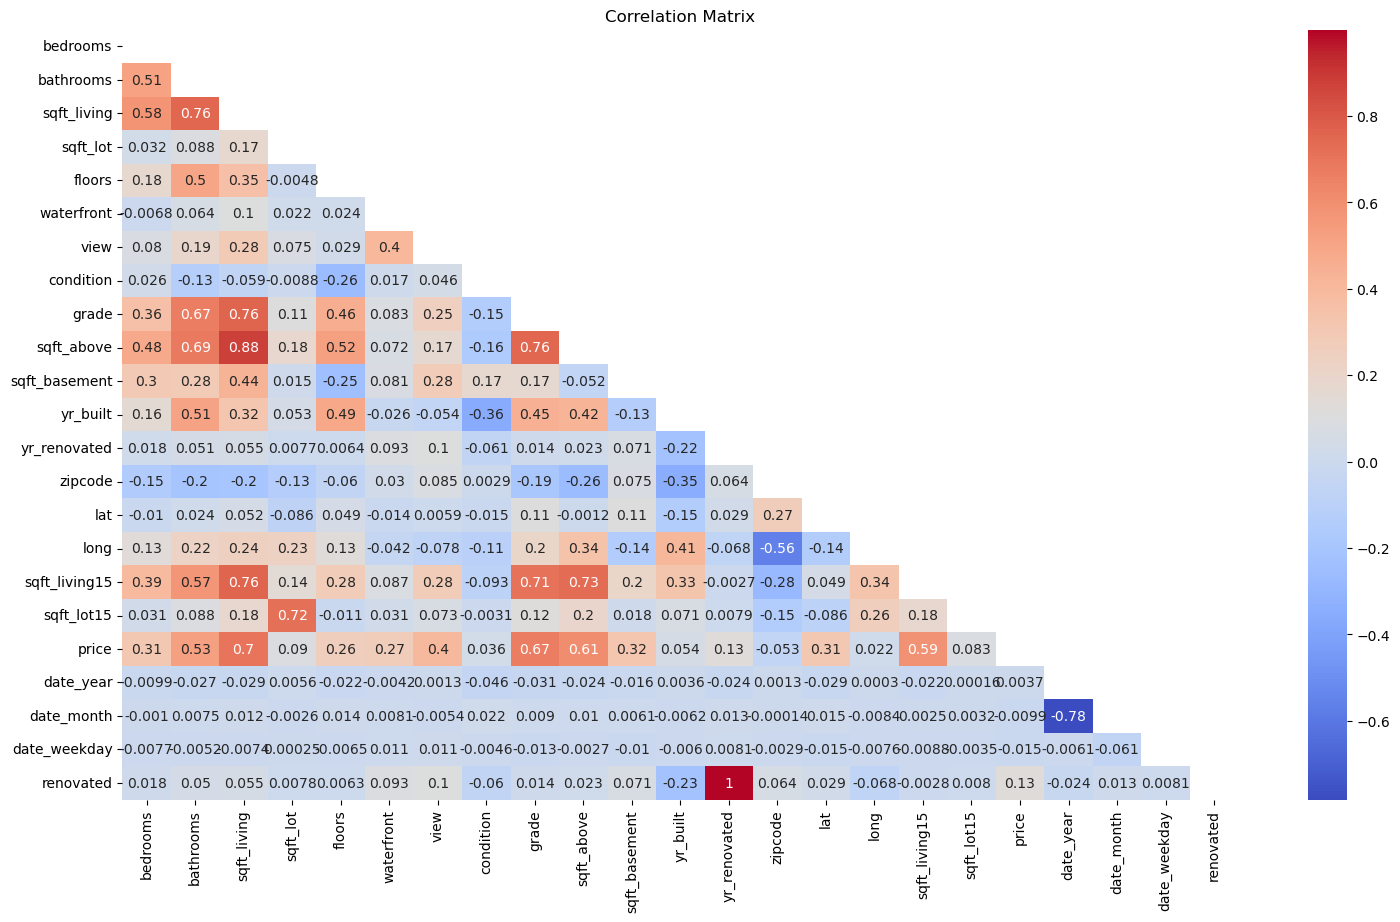

In [47]:
corr_matrix = data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

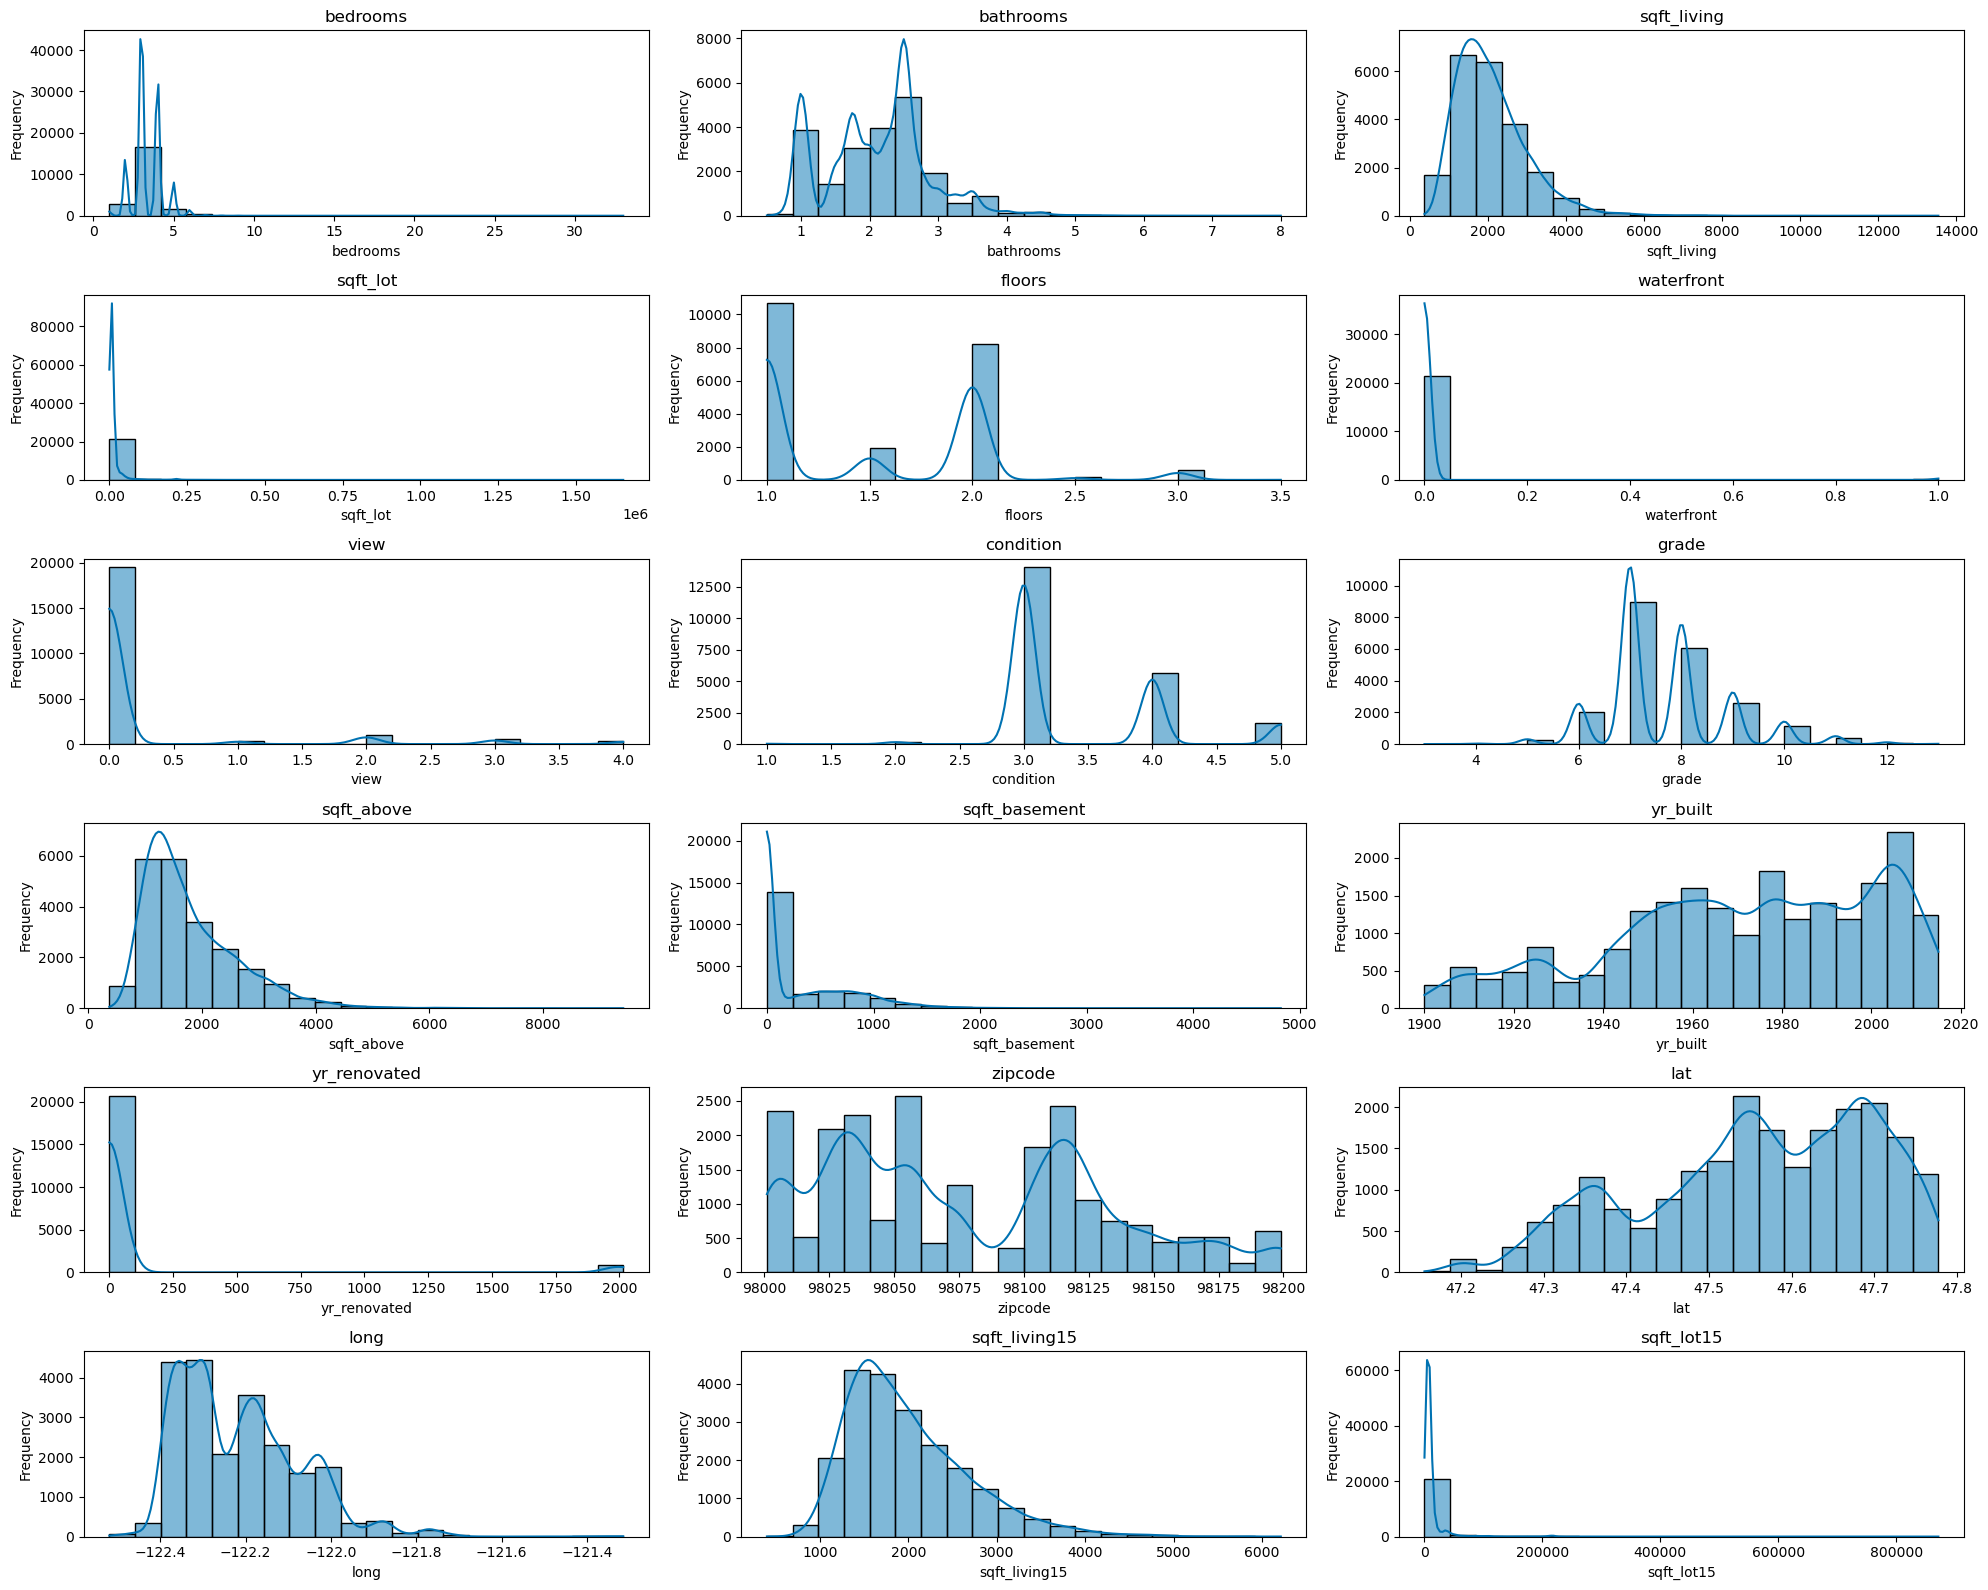

In [48]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 16))
color = '#0072B2'  # blue

for i, ax in enumerate(axes.flat):
    if i >= len(data.columns):
        break
    sns.histplot(data=data, x=data.columns[i], color=color, bins=20, kde=True, ax=ax)
    ax.set_title(data.columns[i])
    ax.set_xlabel(data.columns[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4 Pre-Processing

#### Looking at outliers

In [49]:
data.shape

(21597, 23)

#### Move our target to the right

In [50]:
column_to_move = data['price']

# Drop the column from its original position
data = data.drop('price', axis=1)

# Insert the column at the desired position (e.g., after the second column)
desired_position = 22  # 0-indexed position
data.insert(desired_position, 'price', column_to_move)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_weekday,renovated,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13,0,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,1,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25,0,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9,0,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18,0,510000


## 5 Modelling

### X-Y Split

In [51]:
y = data['price']
X = data.drop(['price'], axis=1)

### Train-Test Split

In [52]:
# Separate training and testing datasets and correspondant targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
len(X_train)

15117

In [54]:
y_train

753       699800
1418     1700000
8178      258000
2254      245000
4063      373000
          ...   
11964     440000
21575     572000
5390      299800
860       245000
15795     545000
Name: price, Length: 15117, dtype: int64

In [55]:
model = LinearRegression() # We have the model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

### Model Validation

In [56]:
predictions = model.predict(X_test)

In [57]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.6883121851327928, 203296.15367314062, 41329326098.293205)

In [58]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

R2 =  0.6883121851327928
RMSE =  203296.15367314062
The value of the metric MSE is  41329326098.293205
MAE =  125263.98252244183


#### Present results

In [59]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
3686,132500,98305.317281,34194.682719
10247,415000,378435.044829,36564.955171
4037,494000,215496.797720,278503.202280
3437,355000,330174.133943,24825.866057
19291,606000,418442.405031,187557.594969
...,...,...,...
9400,1010000,746135.746143,263864.253857
9092,675000,993661.413084,318661.413084
6650,442500,419466.903260,23033.096740
21095,424950,544971.598615,120021.598615


In [60]:
results.sort_values('diff', ascending=True).head(10)

,true,pred,diff
10366,570000,569986.857965,13.142035
10649,178500,178461.400747,38.599253
20230,457000,456954.915684,45.084316
5453,264000,263898.068833,101.931167
9331,501000,501203.982739,203.982739
5942,199000,198747.345476,252.654524
9586,236000,236337.993113,337.993113
7068,350000,349659.820149,340.179851
4203,360000,360352.550758,352.550758
921,255000,255391.571608,391.571608


C:\Users\fekad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true', ylabel='pred'>

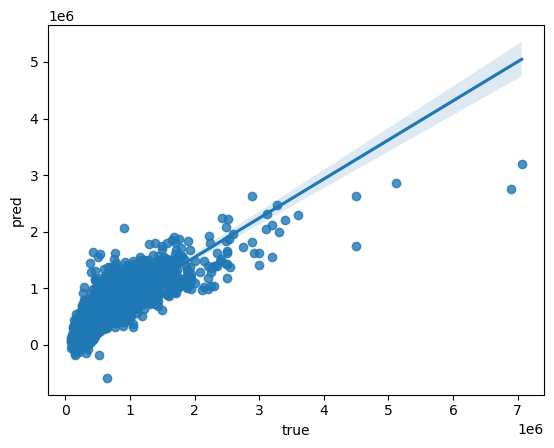

In [61]:
sns.regplot(results['true'], results['pred'])

#### A function that takes a list of models and train tests

In [62]:
def train_test_models(models, X, y, test_size=0.3, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize an empty dictionary to store the evaluation metrics for each model
    eval_dict = {}

    # Loop through the list of models
    for model in models:
        # Train the model on the training set
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the evaluation metrics for the model
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        # Add the evaluation metrics to the dictionary
        eval_dict[type(model).__name__] = {'R-squared': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

    return eval_dict

In [63]:
# Create a list of regression models to train and test
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=16,p=1), MLPRegressor(random_state=42)]

# Call the train_test_models function with the models list and your data
eval_dict = train_test_models(models, X, y, test_size=0.3, random_state=42)

# Print the evaluation metrics for each model
for model_name, metrics in eval_dict.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")

LinearRegression:
  R-squared: 0.6883121851327928
  MSE: 41329326098.293205
  RMSE: 203296.15367314062
  MAE: 125263.98252244183
KNeighborsRegressor:
  R-squared: 0.5098599721429388
  MSE: 64991815781.31775
  RMSE: 254934.92460100038
  MAE: 149353.94313271606
MLPRegressor:
  R-squared: 0.5466872813069437
  MSE: 60108571082.09754
  RMSE: 245170.49390597054
  MAE: 158813.6742196923


C:\Users\fekad\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Let's try to find the best K value from a pre-defined set of values.

In [64]:
scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,13): # The values of K. = 2,3,4,5,6,7,8,9
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

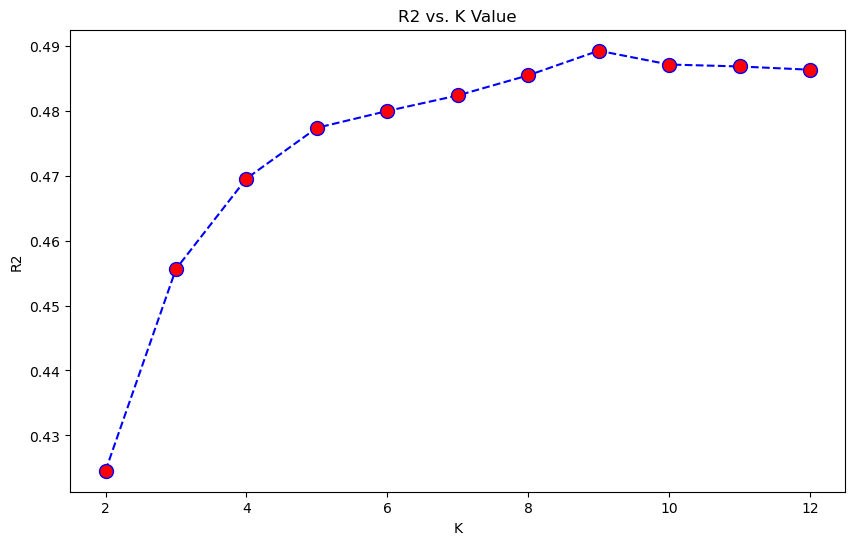

In [65]:
plt.figure(figsize=(10,6))
plt.plot(range(2,13), scores, color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')
plt.show()

#### The best K value is 9, let´s run the model again

In [66]:
# Create a list of regression models to train and test
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=9,p=1), MLPRegressor(random_state=42)]

# Call the train_test_models function with the models list and your data
eval_dict = train_test_models(models, X, y, test_size=0.3, random_state=42)

# Print the evaluation metrics for each model
for model_name, metrics in eval_dict.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")

LinearRegression:
  R-squared: 0.6883121851327928
  MSE: 41329326098.293205
  RMSE: 203296.15367314062
  MAE: 125263.98252244183
KNeighborsRegressor:
  R-squared: 0.5119325393177641
  MSE: 64716996553.413475
  RMSE: 254395.3548188596
  MAE: 149440.81587791495
MLPRegressor:
  R-squared: 0.5466872813069437
  MSE: 60108571082.09754
  RMSE: 245170.49390597054
  MAE: 158813.6742196923


C:\Users\fekad\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 6 Report